In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,timedelta

In [2]:
df=pd.read_csv("Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [3]:
prices=df["Prices"].values
dates=df["Dates"].values

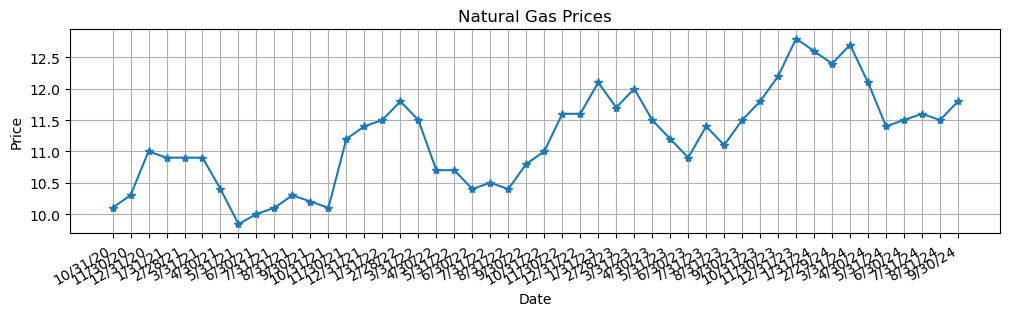

In [4]:
#print(dates)
plt.figure(figsize=(12,3))
plt.plot(dates,prices,"-*")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Natural Gas Prices")
plt.grid(1)

plt.gcf().autofmt_xdate() 

In [5]:
#From the plot  we can see the prices have a natural frequency of around a year, but trend upwards.
#Sin function and linear regression

start_date=date(2020,10,31)
end_date=date(2024,9,30)
months=[]
year=start_date.year
month=start_date.month+1

while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1
days_from_start=[(day-start_date).days for day in months]

In [6]:
def regression(x,y):
    xbar=np.mean(x)
    ybar=np.mean(y)
    slope=np.sum((x-xbar)*(y-ybar))/np.sum((x-xbar)**2)
    intercept=ybar-slope*xbar
    
    return slope,intercept

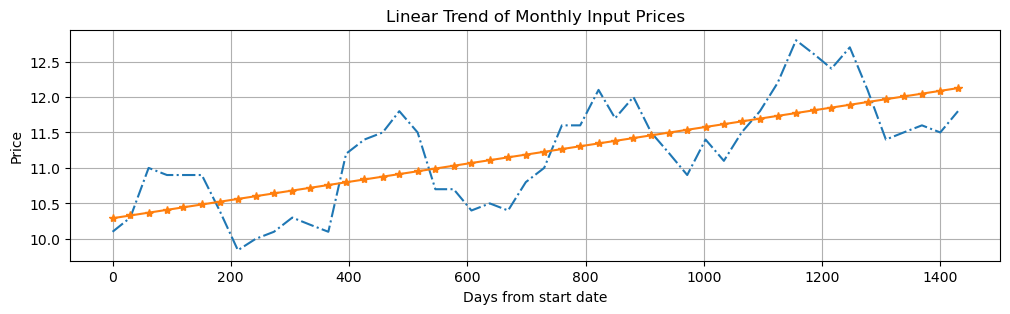

In [7]:
#Linear regression
time = np.array(days_from_start)
slope, intercept = regression(time, prices)

plt.figure(figsize=(12,3))

plt.plot(time, prices,"-.")
plt.plot(time, time * slope + intercept,"-*")
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.grid(1)

plt.show()
#print(slope, intercept)


In [8]:
sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / (365))
cos_time = np.cos(time * 2 * np.pi / (365))

In [10]:
def bilinear_regression(y,x1,x2):
    
    """
    slope1=y*x1/x1^2
    slope2=y*x2/x2^2
    
    """
    slope1=np.sum(y*x1)/np.sum(x1**2)
    slope2=np.sum(y*x2)/np.sum(x2**2)
    return (slope1,slope2)
slope1,slope2=bilinear_regression(sin_prices,sin_time,cos_time)

amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)

Text(0.5, 1.0, 'Smoothed Estimate of Monthly Input Prices')

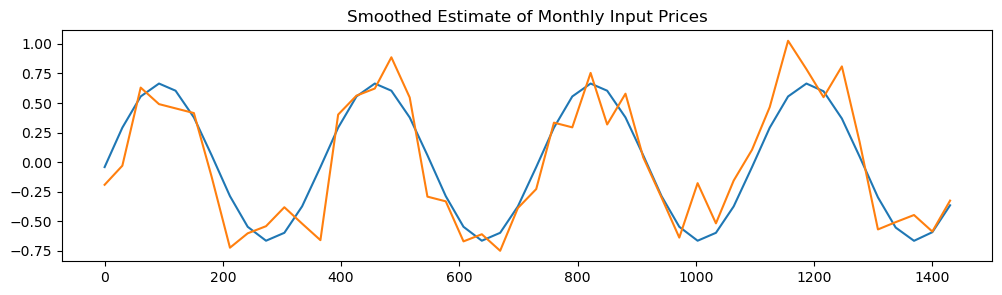

In [12]:
plt.figure(figsize=(12,3))
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift))
plt.plot(time, sin_prices)
plt.title('Smoothed Estimate of Monthly Input Prices')

In [13]:
def interpolate(date):
    """
    插值
    """
    days=(date-pd.Timestamp(start_date)).days
    if days in days_from_start:
        return prices[days_from_start.index(days)]
    else:
        return amplitude*np.sin(days*2*np.pi/365+shift)+days*slope+intercept

In [16]:
continuous_dates=pd.date_range(start=pd.Timestamp(start_date),
                              end=pd.Timestamp(end_date),freq="D")
len(continuous_dates)

1431

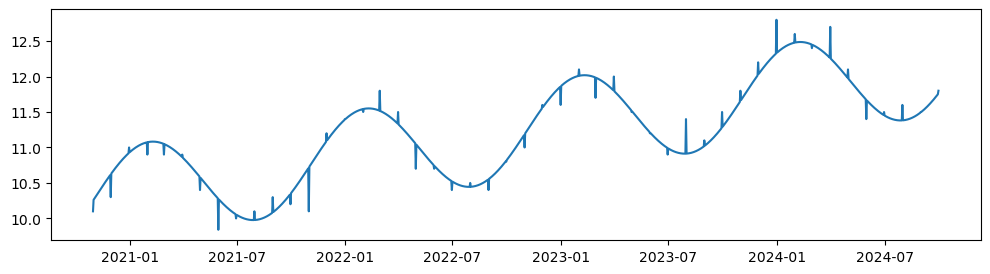

In [18]:
plt.figure(figsize=(12,3))
plt.plot(continuous_dates,[interpolate(date) for date in continuous_dates],
        label="Smoothed Estimate")

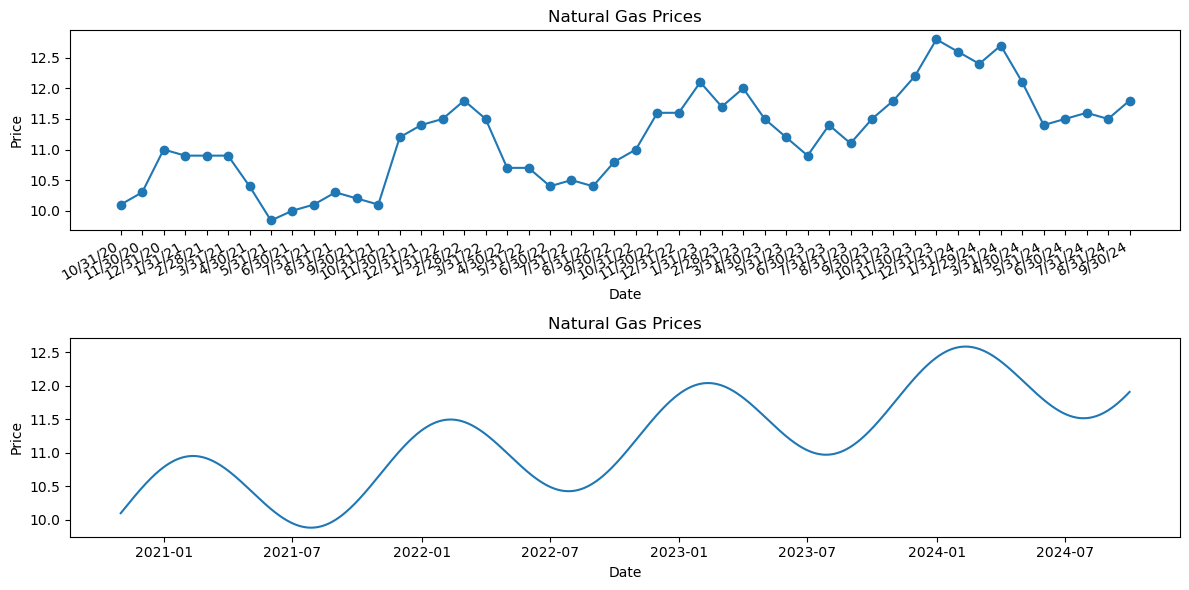

In [33]:
x=np.array(days_from_start)
y=np.array(prices)


fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(dates,y,"-o",label="Monthly input prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Natural Gas Prices")
plt.gcf().autofmt_xdate() 

plt.subplot(2,1,2)
plt.plot(continuous_dates,fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')
#plt.plot(continuous_dates,[interpolate(date) for date in continuous_dates],label="Smoothed Estimate")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Natural Gas Prices")
#plt.legend()

plt.tight_layout()
plt.show()